In [26]:
!pip install numpy==1.25.2


In [27]:
!pip install gensim

In [28]:
import requests
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [29]:
# Link từ Project Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt?fbclid=IwY2xjawJyiTFleHRuA2FlbQIxMAABHodO27l8ZWRYZhtHAhFBT3hX1Ws-_nJHUJiN31FNvbQTANqTJeGP2jowZb7d_aem_ZM7vVQJhgUamxZf7Asj5MA"

# Gửi request và lấy nội dung
response = requests.get(url)
text = response.text

# In thử 500 ký tự đầu tiên
print(text[:500])


*** START OF THE PROJECT GUTENBERG EBOOK 11 ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Grou


In [30]:
# Tải tài nguyên từ NLTK (chạy 1 lần)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Gói này hỗ trợ lemmatizer tốt hơn

# 1. Chuyển chữ thườn
text = text.lower()

# 2. Loại bỏ dấu câu và số
text = re.sub(r'[\d]', '', text)
text = text.translate(str.maketrans('', '', string.punctuation))

# 3. Tokenize
tokens = text.split()  # Thay thế word_tokenize tạm thời


# 4. Loại bỏ stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Kết quả: danh sách từ đã được làm sạch
print(lemmatized_tokens[:100])  # In thử 100 từ đầu


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['start', 'project', 'gutenberg', 'ebook', 'illustration', 'alice’s', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queen’s', 'croquetground', 'chapter', 'ix', 'mock', 'turtle’s', 'story', 'chapter', 'lobster', 'quadrille', 'chapter', 'xi', 'stole', 'tart', 'chapter', 'xii', 'alice’s', 'evidence', 'chapter', 'rabbithole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'picture', 'conversation', '“and', 'use', 'book”', 'thought', 'alice', '“without', 'picture', 'conversations”', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'p

[nltk_data]   Package omw-1.4 is already up-to-date!


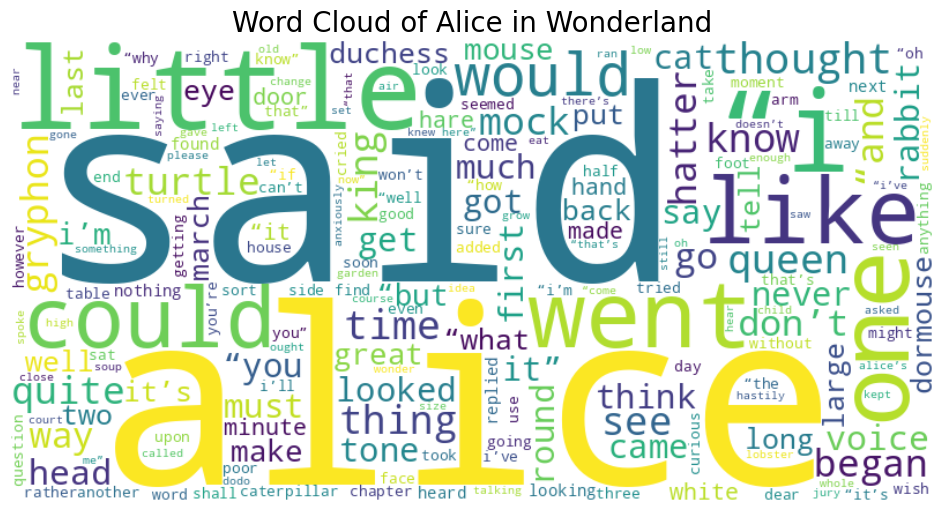

In [31]:
word_freq = Counter(lemmatized_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Alice in Wonderland', fontsize=20)
plt.show()


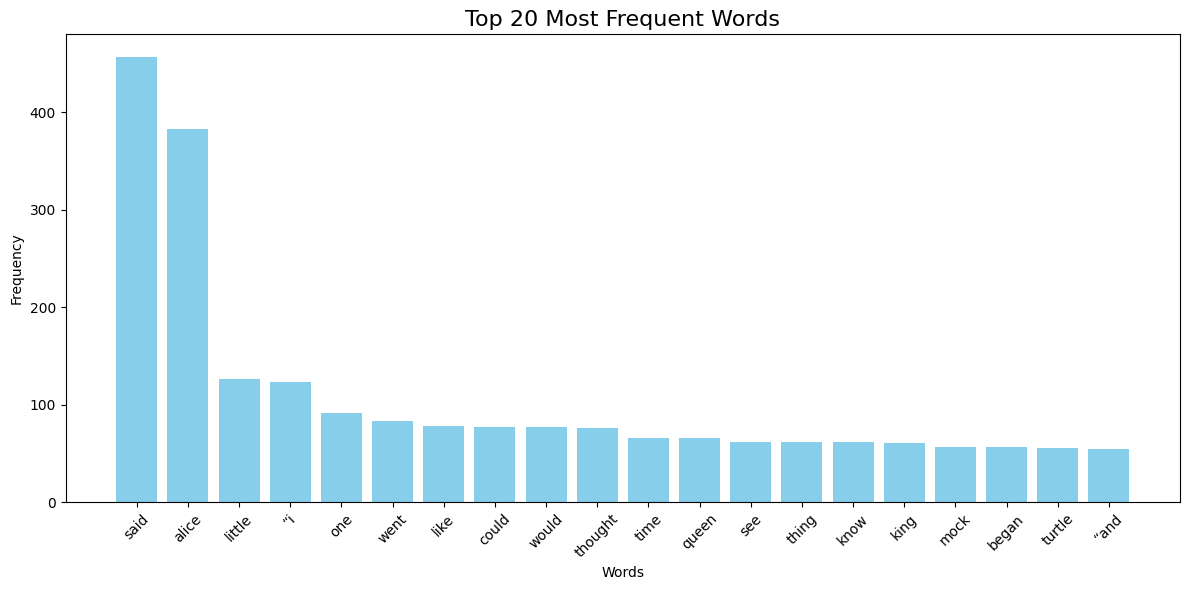

In [32]:
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


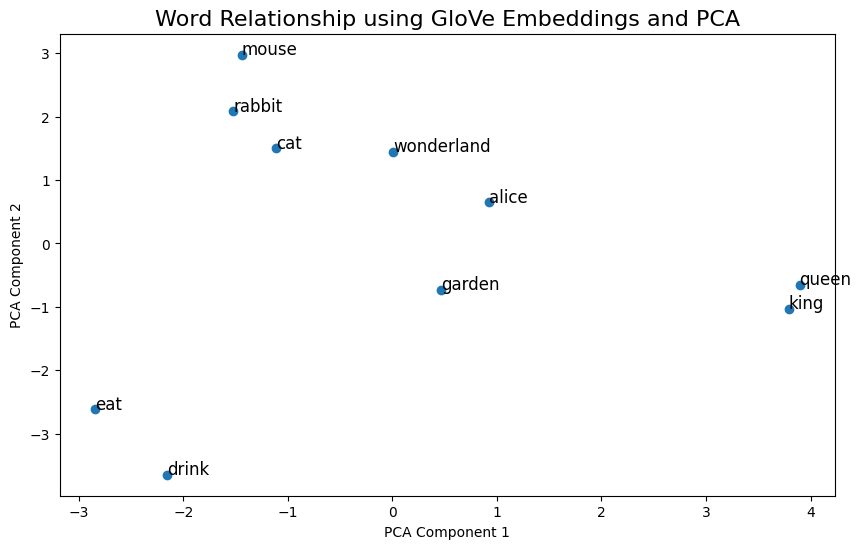

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from gensim.models.keyedvectors import KeyedVectors # This import is no longer needed
#from gensim.models import Word2Vec #This import is no longer needed

# Tải GloVe (hoặc bạn có thể tải từ các link khác nếu cần)
# Đảm bảo tải tệp GloVe từ website hoặc nguồn tin cậy: https://nlp.stanford.edu/projects/glove/

# Ví dụ này sẽ sử dụng file GloVe 50 chiều
glove_file_path = '/content/glove-wiki-gigaword-100.model.vectors.npy'  # Đảm bảo thay đổi đường dẫn đến tệp GloVe của bạn

# Load the GloVe embeddings using NumPy since it's a .npy file
# and skip the first line which may contain metadata
word_vectors = np.load("glove_dict.npy", allow_pickle=True).item()


# Lấy ra danh sách các từ cần phân tích (có thể sử dụng từ ngữ phổ biến từ văn bản)
words = ['alice', 'wonderland', 'rabbit', 'queen', 'king', 'garden', 'eat', 'drink', 'cat', 'mouse']

# Lấy vector GloVe cho các từ này
# Adjust how you access word vectors based on the data structure of word_vectors
word_vecs = np.array([word_vectors[word] for word in words if word in word_vectors])

# Áp dụng PCA để giảm chiều từ 50 xuống 2
pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(word_vecs)

# Vẽ các từ trên biểu đồ 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vecs[:, 0], reduced_vecs[:, 1])

# Gắn nhãn cho các điểm
for i, word in enumerate(words):
    if word in word_vectors:  # Ensure word has a vector before plotting
        plt.text(reduced_vecs[i, 0], reduced_vecs[i, 1], word, fontsize=12)

# Tiêu đề và nhãn trục
plt.title('Word Relationship using GloVe Embeddings and PCA', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Hiển thị biểu đồ
plt.show()

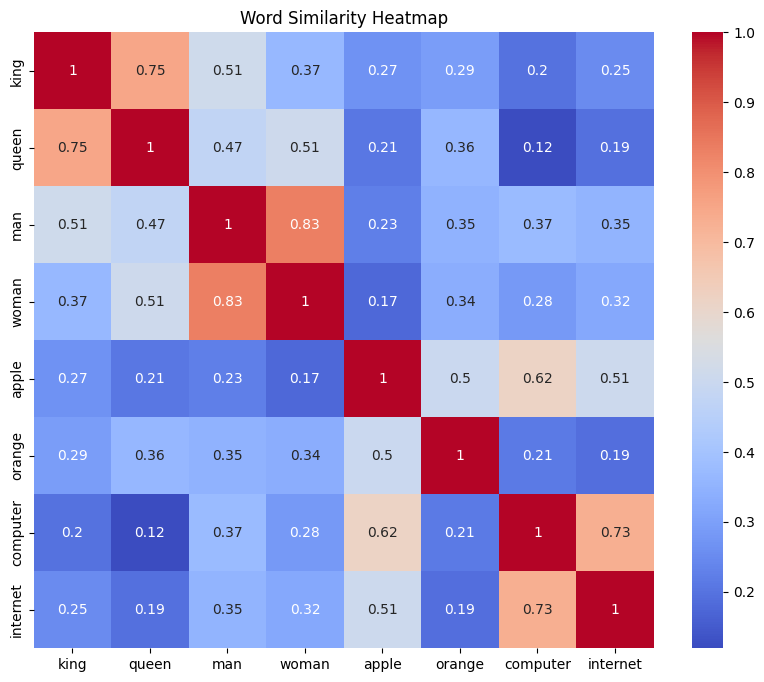

In [34]:
# 1. Load GloVe model
model = api.load("glove-wiki-gigaword-100")

# 2. Select words to compare
words = ["king", "queen", "man", "woman", "apple", "orange", "computer", "internet"]

# 3. Get vectors for each word
vectors = np.array([model[word] for word in words])

# 4. Compute cosine similarity
similarity_matrix = cosine_similarity(vectors)

# 5. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm')
plt.title("Word Similarity Heatmap")
plt.show()